In [1]:
# 페션 데이터 읽어들이고, 훈련/테스트 데이터셋 분류
# 모델생성
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# 패션데이터 읽어들이기
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 정규화하기
train_scaled = train_input / 255.0
# 차원축소 하지 않기
# 훈련 및 검증 데이터셋으로 분류하기(8:2)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,
                                                                      test_size=0.2,random_state=42)

print(train_scaled.shape,train_target.shape)
print(val_scaled.shape,val_target.shape)


(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


In [3]:
# 신경망 모델 및 신경망층 생성 함수

def model_fn(add_layer = None):
    model = keras.Sequential()
    # 전처리층 : 1차원으로 만들기
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    # 은닉층 : 훈련에 관여
    model.add(keras.layers.Dense(100,activation="relu"))
    
    if add_layer:
        model.add(add_layer)
    # 출력층
    model.add(keras.layers.Dense(10,activation="softmax"))
    
    return model

In [4]:
# 반복 5번 수행하는 모델 생성
model5 = model_fn()
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 모델 설정하기
model5.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
model5

In [6]:
# verbose : 0~2의 값 사용하여 출력결과 선택가능
# 1 : 전체 다 보여주기
# 2 : 결과값만 보여주기(진행 bar 안보임)
# 0 : 아무것도 안보여주기(속도를 향상시키지만, 결과같 확인 어렵)
history5 = model5.fit(train_scaled,train_target,epochs=5,verbose=1)
history5

Epoch 1/5
1500/1500 [==============================] - 1s 778us/step - loss: 0.5355 - accuracy: 0.8112
Epoch 2/5
1500/1500 [==============================] - 1s 767us/step - loss: 0.3938 - accuracy: 0.8576
Epoch 3/5
1500/1500 [==============================] - 1s 782us/step - loss: 0.3566 - accuracy: 0.8725
Epoch 4/5
1500/1500 [==============================] - 1s 767us/step - loss: 0.3348 - accuracy: 0.8799
Epoch 5/5
1500/1500 [==============================] - 1s 742us/step - loss: 0.3203 - accuracy: 0.8856


In [7]:
history5 = model5.fit(train_scaled,train_target,epochs=5,verbose=0)
history5

In [8]:
history5 = model5.fit(train_scaled,train_target,epochs=5,verbose=2)
history5

Epoch 1/5
1500/1500 - 1s - loss: 0.2687 - accuracy: 0.9046 - 925ms/epoch - 617us/step
Epoch 2/5
1500/1500 - 1s - loss: 0.2619 - accuracy: 0.9091 - 996ms/epoch - 664us/step
Epoch 3/5
1500/1500 - 1s - loss: 0.2591 - accuracy: 0.9107 - 896ms/epoch - 597us/step
Epoch 4/5
1500/1500 - 1s - loss: 0.2524 - accuracy: 0.9130 - 877ms/epoch - 585us/step
Epoch 5/5
1500/1500 - 1s - loss: 0.2500 - accuracy: 0.9138 - 889ms/epoch - 593us/step


In [10]:
# 훈련결과 확인하기
print("반복횟수 : ", history5.epoch)
print("손실계수/정확도 : ", history5.history)
print("훈련결과 키워드 : ", history5.history.keys())

반복횟수 :  [0, 1, 2, 3, 4]
손실계수/정확도 :  {'loss': [0.2686805725097656, 0.26194649934768677, 0.2591077387332916, 0.2524348497390747, 0.2500270903110504], 'accuracy': [0.9046458601951599, 0.9091458320617676, 0.9107499718666077, 0.9129583239555359, 0.9137916564941406]}
훈련결과 키워드 :  dict_keys(['loss', 'accuracy'])


In [19]:
# 출력 디자인
for i, epoch in enumerate(history5.epoch):
    print("epoch =",i,"|","loss = ",history5.history['loss'][i],"|","accuracy = ",history5.history['accuracy'][i])
# round() 써서 깔끔하게

epoch = 0 | loss =  0.2686805725097656 | accuracy =  0.9046458601951599
epoch = 1 | loss =  0.26194649934768677 | accuracy =  0.9091458320617676
epoch = 2 | loss =  0.2591077387332916 | accuracy =  0.9107499718666077
epoch = 3 | loss =  0.2524348497390747 | accuracy =  0.9129583239555359
epoch = 4 | loss =  0.2500270903110504 | accuracy =  0.9137916564941406


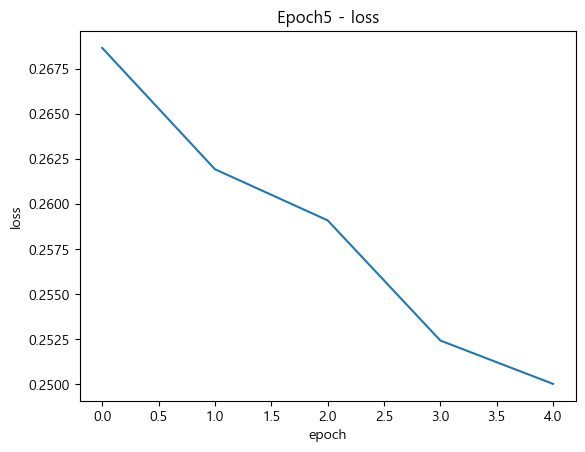

In [23]:
# 손실(loss)곡선 그리기
# 손실률(손실계수)의 변화 확인가능
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history5.epoch, history5.history["loss"])
plt.title("Epoch5 - loss")
plt.xlabel("epoch")
plt.ylabel("loss")

# 그래프저장
plt.savefig("./image/01_Epoch5Loss", dpi=300)
plt.show()

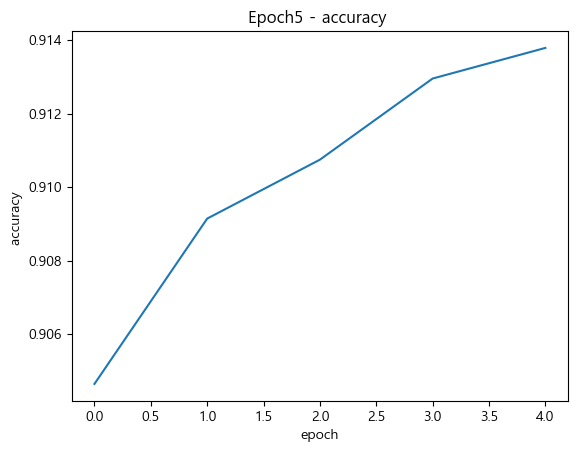

In [25]:
# 정확도(accuracy )곡선 그리기
# 정확도의 변화 확인가능
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history5.epoch, history5.history["accuracy"])
plt.title("Epoch5 - accuracy ")
plt.xlabel("epoch")
plt.ylabel("accuracy ")

# 그래프저장
plt.savefig("./image/01_Epoch5accuracy ", dpi=300)
plt.show()

In [ ]:
# 새로 모델 생성하고 반복횟수 20회로 훈련 시킨 후 손실곡선과 정확도 곡선 그리기

Epoch 1/20
1500/1500 [==============================] - 1s 725us/step - loss: 0.5241 - accuracy: 0.8155
Epoch 2/20
1500/1500 [==============================] - 1s 735us/step - loss: 0.3899 - accuracy: 0.8609
Epoch 3/20
1500/1500 [==============================] - 1s 783us/step - loss: 0.3509 - accuracy: 0.8731
Epoch 4/20
1500/1500 [==============================] - 1s 757us/step - loss: 0.3319 - accuracy: 0.8818
Epoch 5/20
1500/1500 [==============================] - 1s 735us/step - loss: 0.3171 - accuracy: 0.8862
Epoch 6/20
1500/1500 [==============================] - 1s 740us/step - loss: 0.3049 - accuracy: 0.8914
Epoch 7/20
1500/1500 [==============================] - 1s 745us/step - loss: 0.2999 - accuracy: 0.8930
Epoch 8/20
1500/1500 [==============================] - 1s 792us/step - loss: 0.2882 - accuracy: 0.8976
Epoch 9/20
1500/1500 [==============================] - 1s 774us/step - loss: 0.2835 - accuracy: 0.9010
Epoch 10/20
1500/1500 [==============================] - 1s 776u

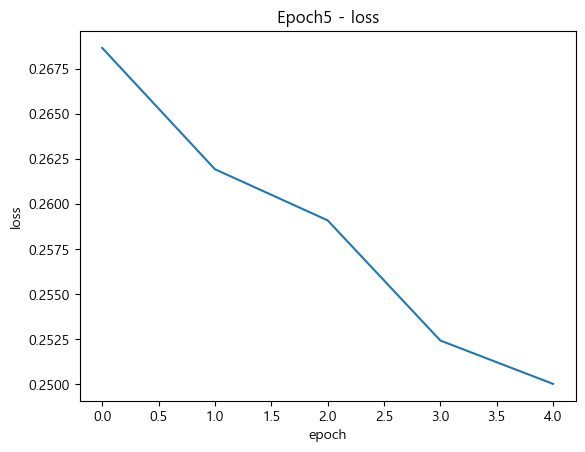

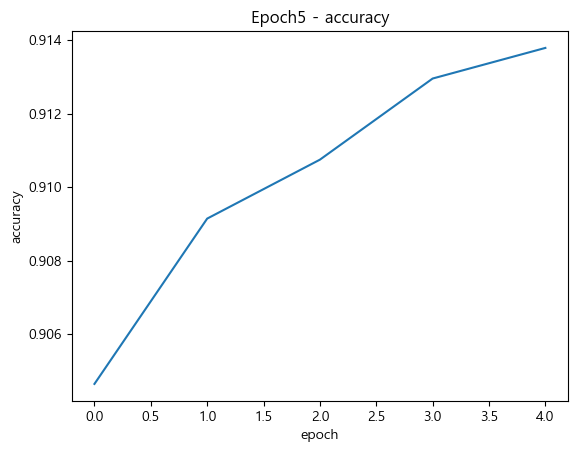

In [27]:
# 반복 20번 수행하는 모델 생성
model20 = model_fn()

# 모델 설정하기
model20.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

# 훈련
history20 = model20.fit(train_scaled,train_target,epochs=20,verbose=1)

# 곡선그리기
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

kind = ["loss","accuracy"]

for i in kind:
    plt.plot(history5.epoch, history5.history[i])
    plt.title("Epoch5 - {}".format(i))
    plt.xlabel("epoch")
    plt.ylabel(i)

    # 그래프저장
    plt.savefig("./image/01_Epoch5{}".format(i), dpi=300)
    plt.show()

In [28]:
# 모델 훈련 및 검증을 동시에 수행
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
# 훈련과 검증을 동시에 훈련
history = model.fit(train_scaled,train_target,epochs=20,verbose=1,
                   validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 [==============================] - 1s 896us/step - loss: 0.5317 - accuracy: 0.8099 - val_loss: 0.4343 - val_accuracy: 0.8432
Epoch 2/20
1500/1500 [==============================] - 1s 901us/step - loss: 0.3915 - accuracy: 0.8587 - val_loss: 0.3953 - val_accuracy: 0.8609
Epoch 3/20
1500/1500 [==============================] - 1s 897us/step - loss: 0.3561 - accuracy: 0.8721 - val_loss: 0.3748 - val_accuracy: 0.8672
Epoch 4/20
1500/1500 [==============================] - 1s 869us/step - loss: 0.3345 - accuracy: 0.8797 - val_loss: 0.3645 - val_accuracy: 0.8773
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3215 - accuracy: 0.8863 - val_loss: 0.3713 - val_accuracy: 0.8777
Epoch 6/20
1500/1500 [==============================] - 1s 953us/step - loss: 0.3089 - accuracy: 0.8906 - val_loss: 0.3563 - val_accuracy: 0.8852
Epoch 7/20
1500/1500 [==============================] - 1s 854us/step - loss: 0.3007 - accuracy: 0.8939 - val_loss: 0.3780 - v

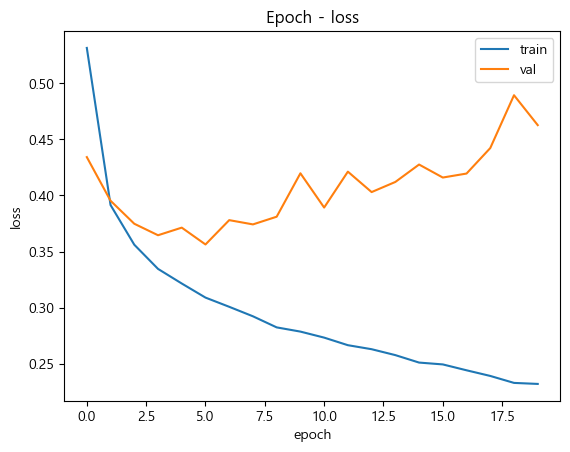

In [36]:
# 훈련 및 검증에 대한 손실곡선을 하나의 그래프로 그리기
# 손실(loss)곡선 그리기
# 손실률(손실계수)의 변화 확인가능
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["loss"],label="train")
plt.plot(history.epoch, history.history["val_loss"],label="val")
plt.title("Epoch - loss")
plt.xlabel("epoch")
plt.ylabel("loss")


# 그래프저장
plt.savefig("./image/01_Epoch5Loss", dpi=300)
plt.legend()
plt.show()